In [26]:
import pandas as pd
import numpy as np
import re
from nltk import pos_tag
import nltk
import os
import codecs
from sklearn import feature_extraction
from sklearn.feature_extraction import text 
import mpld3
import preprocessor as p
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence

%matplotlib inline
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [51]:
tweets = pd.read_pickle("./unlabeled_tweets_df.pkl")

In [52]:
print(tweets.shape)
tweets.head(3)

(4263443, 12)


,created_at,full_text,hashtags,language,location,mentions,source,text,tweet_id,user_id,user_name,user_screen_name
1,Mon Jun 05 02:08:08 +0000 2017,,"[SundayMorning, LondonAttack, PrayForManchester]",en,None,"[Kambree Kawahine Koa, KamVTV]","<a href=""http://twitter.com/download/iphone"" r...","RT @KamVTV: Breaking : 5,000 Canadians March i...",871549166970916869,541145032,concerned citizen,Morsebandit
3,Mon Jun 05 02:08:08 +0000 2017,,[],en,None,[],"<a href=""http://twitter.com/download/iphone"" r...",my legs so fucked up right now this pain killi...,871549166954070016,824843851642785792,Jrrr,Juni10rr
4,Mon Jun 05 02:08:08 +0000 2017,,[],en,None,"[Fred Delicious, Fred_Delicious]","<a href=""http://twitter.com/download/android"" ...",RT @Fred_Delicious: A haunted dildo called the...,871549166983536647,853874076,MayorOfSpicyTown,JTimbertwerk


In [53]:
tweets = tweets.loc[tweets.language == "en", ]
tweets = tweets.reset_index(drop = True)
tweets.shape

(4263443, 12)

In [54]:
tweets.loc[:, ["text", "full_text", "hashtags", "mentions"]]

,text,full_text,hashtags,mentions
0,"RT @KamVTV: Breaking : 5,000 Canadians March i...",,"[SundayMorning, LondonAttack, PrayForManchester]","[Kambree Kawahine Koa, KamVTV]"
1,my legs so fucked up right now this pain killi...,,[],[]
2,RT @Fred_Delicious: A haunted dildo called the...,,[],"[Fred Delicious, Fred_Delicious]"
3,My money says he has https://t.co/Wut7hmdsKs,,[],[]
4,Which Flint Officials said this? @JordanCharit...,,[],"[Jordan, JordanChariton]"
5,RT @305DJSKINZ: 🗣🗣IF EVERYONE WASH THEY OWN ...,,[],"[1000, 305DJSKINZ]"
6,RT @EmrgencyKittens: mood https://t.co/GnDBku1bgv,,[],"[Emergency Kittens, EmrgencyKittens]"
7,@Archie_DaStoner thanks for the feedback,,[],"[Drench Gawd 🏌🏿, Archie_DaStoner]"
8,RT @CodyMarriott: It's really sad watching som...,,[],"[Cody Marriott, CodyMarriott]"
9,@Luke_Calvert 1-0 against the KD warriors with...,,[],"[Luke Calvert, Luke_Calvert]"


In [55]:
tweets.hashtags = map(lambda lst: ' '.join(lst), tweets.hashtags)
#tweets.mentions= map(lambda lst: ' '.join(lst), tweets.mentions)
tweets.loc[:, ["hashtags", "mentions"]]

,hashtags,mentions
0,SundayMorning LondonAttack PrayForManchester,"[Kambree Kawahine Koa, KamVTV]"
1,,[]
2,,"[Fred Delicious, Fred_Delicious]"
3,,[]
4,,"[Jordan, JordanChariton]"
5,,"[1000, 305DJSKINZ]"
6,,"[Emergency Kittens, EmrgencyKittens]"
7,,"[Drench Gawd 🏌🏿, Archie_DaStoner]"
8,,"[Cody Marriott, CodyMarriott]"
9,,"[Luke Calvert, Luke_Calvert]"


In [56]:
tweets["longer_text"] = tweets['text'].where(tweets.full_text == '', tweets['full_text'])
tweets.loc[:, ["text", "full_text", "longer_text"]]

,text,full_text,longer_text
0,"RT @KamVTV: Breaking : 5,000 Canadians March i...",,"RT @KamVTV: Breaking : 5,000 Canadians March i..."
1,my legs so fucked up right now this pain killi...,,my legs so fucked up right now this pain killi...
2,RT @Fred_Delicious: A haunted dildo called the...,,RT @Fred_Delicious: A haunted dildo called the...
3,My money says he has https://t.co/Wut7hmdsKs,,My money says he has https://t.co/Wut7hmdsKs
4,Which Flint Officials said this? @JordanCharit...,,Which Flint Officials said this? @JordanCharit...
5,RT @305DJSKINZ: 🗣🗣IF EVERYONE WASH THEY OWN ...,,RT @305DJSKINZ: 🗣🗣IF EVERYONE WASH THEY OWN ...
6,RT @EmrgencyKittens: mood https://t.co/GnDBku1bgv,,RT @EmrgencyKittens: mood https://t.co/GnDBku1bgv
7,@Archie_DaStoner thanks for the feedback,,@Archie_DaStoner thanks for the feedback
8,RT @CodyMarriott: It's really sad watching som...,,RT @CodyMarriott: It's really sad watching som...
9,@Luke_Calvert 1-0 against the KD warriors with...,,@Luke_Calvert 1-0 against the KD warriors with...


In [57]:
tweets.longer_text = map(lambda text: re.sub("^RT", "", text).strip(), tweets.longer_text)
tweets.loc[:, ["text", "full_text", "longer_text"]]

,text,full_text,longer_text
0,"RT @KamVTV: Breaking : 5,000 Canadians March i...",,"@KamVTV: Breaking : 5,000 Canadians March in S..."
1,my legs so fucked up right now this pain killi...,,my legs so fucked up right now this pain killi...
2,RT @Fred_Delicious: A haunted dildo called the...,,@Fred_Delicious: A haunted dildo called the Ba...
3,My money says he has https://t.co/Wut7hmdsKs,,My money says he has https://t.co/Wut7hmdsKs
4,Which Flint Officials said this? @JordanCharit...,,Which Flint Officials said this? @JordanCharit...
5,RT @305DJSKINZ: 🗣🗣IF EVERYONE WASH THEY OWN ...,,@305DJSKINZ: 🗣🗣IF EVERYONE WASH THEY OWN DIS...
6,RT @EmrgencyKittens: mood https://t.co/GnDBku1bgv,,@EmrgencyKittens: mood https://t.co/GnDBku1bgv
7,@Archie_DaStoner thanks for the feedback,,@Archie_DaStoner thanks for the feedback
8,RT @CodyMarriott: It's really sad watching som...,,@CodyMarriott: It's really sad watching someon...
9,@Luke_Calvert 1-0 against the KD warriors with...,,@Luke_Calvert 1-0 against the KD warriors with...


In [58]:
tweets.loc[:, ["longer_text", "hashtags"]]

,longer_text,hashtags
0,"@KamVTV: Breaking : 5,000 Canadians March in S...",SundayMorning LondonAttack PrayForManchester
1,my legs so fucked up right now this pain killi...,
2,@Fred_Delicious: A haunted dildo called the Ba...,
3,My money says he has https://t.co/Wut7hmdsKs,
4,Which Flint Officials said this? @JordanCharit...,
5,@305DJSKINZ: 🗣🗣IF EVERYONE WASH THEY OWN DIS...,
6,@EmrgencyKittens: mood https://t.co/GnDBku1bgv,
7,@Archie_DaStoner thanks for the feedback,
8,@CodyMarriott: It's really sad watching someon...,
9,@Luke_Calvert 1-0 against the KD warriors with...,


In [59]:
tweets["text_to_use"] = tweets.longer_text + " " + tweets.hashtags #+ " " + tweets.mentions
tweets.loc[:, ["longer_text", "text_to_use"]]

,longer_text,text_to_use
0,"@KamVTV: Breaking : 5,000 Canadians March in S...","@KamVTV: Breaking : 5,000 Canadians March in S..."
1,my legs so fucked up right now this pain killi...,my legs so fucked up right now this pain killi...
2,@Fred_Delicious: A haunted dildo called the Ba...,@Fred_Delicious: A haunted dildo called the Ba...
3,My money says he has https://t.co/Wut7hmdsKs,My money says he has https://t.co/Wut7hmdsKs
4,Which Flint Officials said this? @JordanCharit...,Which Flint Officials said this? @JordanCharit...
5,@305DJSKINZ: 🗣🗣IF EVERYONE WASH THEY OWN DIS...,@305DJSKINZ: 🗣🗣IF EVERYONE WASH THEY OWN DIS...
6,@EmrgencyKittens: mood https://t.co/GnDBku1bgv,@EmrgencyKittens: mood https://t.co/GnDBku1bgv
7,@Archie_DaStoner thanks for the feedback,@Archie_DaStoner thanks for the feedback
8,@CodyMarriott: It's really sad watching someon...,@CodyMarriott: It's really sad watching someon...
9,@Luke_Calvert 1-0 against the KD warriors with...,@Luke_Calvert 1-0 against the KD warriors with...


In [60]:
tweets.text_to_use = map(lambda text: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", text).split()), tweets.text_to_use)
tweets.loc[:, ["longer_text", "text_to_use"]]

,longer_text,text_to_use
0,"@KamVTV: Breaking : 5,000 Canadians March in S...",Breaking 5 000 Canadians March in Support of P...
1,my legs so fucked up right now this pain killi...,my legs so fucked up right now this pain killi...
2,@Fred_Delicious: A haunted dildo called the Ba...,Delicious A haunted dildo called the Babadick
3,My money says he has https://t.co/Wut7hmdsKs,My money says he has
4,Which Flint Officials said this? @JordanCharit...,Which Flint Officials said this
5,@305DJSKINZ: 🗣🗣IF EVERYONE WASH THEY OWN DIS...,IF EVERYONE WASH THEY OWN DISH WHEN THEY DONE ...
6,@EmrgencyKittens: mood https://t.co/GnDBku1bgv,mood
7,@Archie_DaStoner thanks for the feedback,DaStoner thanks for the feedback
8,@CodyMarriott: It's really sad watching someon...,It s really sad watching someone you cared abo...
9,@Luke_Calvert 1-0 against the KD warriors with...,Calvert 1 0 against the KD warriors with Liggi...


In [61]:
tweets.text_to_use = map(lambda text: text.lower(), tweets.text_to_use)
tweets.loc[:, ["longer_text", "text_to_use"]]

,longer_text,text_to_use
0,"@KamVTV: Breaking : 5,000 Canadians March in S...",breaking 5 000 canadians march in support of p...
1,my legs so fucked up right now this pain killi...,my legs so fucked up right now this pain killi...
2,@Fred_Delicious: A haunted dildo called the Ba...,delicious a haunted dildo called the babadick
3,My money says he has https://t.co/Wut7hmdsKs,my money says he has
4,Which Flint Officials said this? @JordanCharit...,which flint officials said this
5,@305DJSKINZ: 🗣🗣IF EVERYONE WASH THEY OWN DIS...,if everyone wash they own dish when they done ...
6,@EmrgencyKittens: mood https://t.co/GnDBku1bgv,mood
7,@Archie_DaStoner thanks for the feedback,dastoner thanks for the feedback
8,@CodyMarriott: It's really sad watching someon...,it s really sad watching someone you cared abo...
9,@Luke_Calvert 1-0 against the KD warriors with...,calvert 1 0 against the kd warriors with liggi...


In [62]:
tweets.shape

(4263443, 14)

In [14]:
# #train = tweets.loc[tweets.hashtags != "",].text_to_use
# train = tweets.text_to_use.unique()
# train.shape

(238581,)

In [72]:
tweets_hash = tweets.loc[tweets.hashtags != "",]
test = np.random.choice(tweets_hash.text_to_use.unique(), size=250000, replace=False, p=None)
print(tweets_hash.text_to_use.unique().shape)
print(tweets.text_to_use.unique().shape)
print(test.shape)

(406403,)
(1978032,)
(250000,)


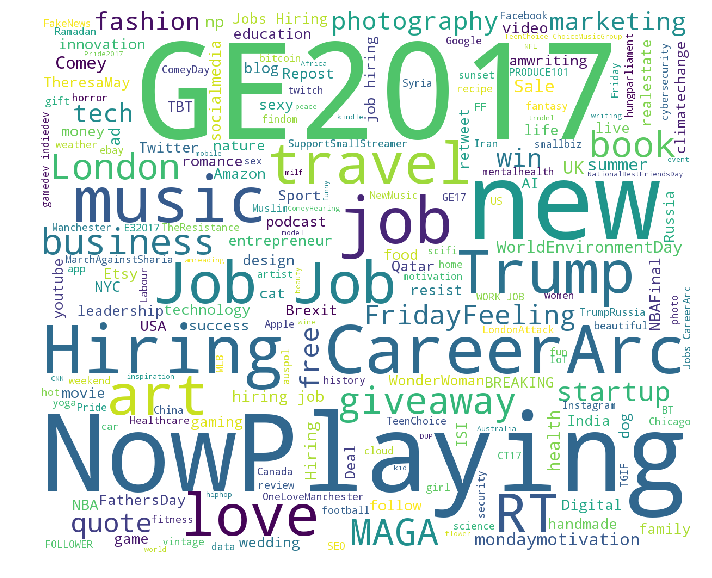

In [64]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(tweets.hashtags.unique()))
plt.figure(figsize=(16,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [596]:
en_stop = get_stop_words('en') + ['http','retweet', 'rt', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 
'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 
'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was',
 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 
'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before',
 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 
'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor',
'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just',
 'don', 'should', 'now', "amp", "http", "https"]

In [16]:
from nltk.corpus import stopwords

stop = stopwords.words('english')[:] + ["shit","lol","lmao","lmaoo","fuck","fucking","na",
                                            "https","http","people","amp","gt","ll","rt", "i",
                                            "retweet","nan", "ur","oh","ve","nigga","niggas","im","gon",
                                            "yall","nan","ill","im", "via", "love", "hate", "like", "bitch"]


In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import numpy as np

def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print("Topic %d:" % (topic_idx))
        print("Top Words: ", " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        print("\n")
        for doc_index in top_doc_indices:
            print("Tweet: ", documents[doc_index])
        print("\n")

# 20        
        
# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=50, stop_words=stop, ngram_range=(1, 2))
tfidf = tfidf_vectorizer.fit_transform(test)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=50, stop_words=stop, ngram_range=(1, 2))
tf = tf_vectorizer.fit_transform(test)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 30

# Run NMF
nmf_model = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
nmf_W = nmf_model.transform(tfidf)
nmf_H = nmf_model.components_

# Run LDA
lda_model = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda_W = lda_model.transform(tf)
lda_H = lda_model.components_

no_top_words = 15
no_top_documents = 5
print("NMF")
display_topics(nmf_H, nmf_W, tfidf_feature_names, test, no_top_words, no_top_documents)
print("\n")
print("LDA")
display_topics(lda_H, lda_W, tf_feature_names, test, no_top_words, no_top_documents)

NMF
Topic 0:
Top Words:  veranomtv2017 gaga lady gaga lady veranomtv2017 lady gaga veranomtv2017 niall4mmva veranomtv2017 niall4mmva tmj jason derulo derulo jason veranomtv2017 harry harry styles harry


Tweet:  vclesoldier2011 veranomtv2017 lady gaga veranomtv2017
Tweet:  astoldbyricoo veranomtv2017 lady gaga veranomtv2017
Tweet:  718shaun veranomtv2017 lady gaga veranomtv2017
Tweet:  elillianna277 veranomtv2017 lady gaga veranomtv2017
Tweet:  sassysexysheria veranomtv2017 lady gaga veranomtv2017


Topic 1:
Top Words:  nowplaying listenlive nowplaying listenlive nowplaying nowplaying radio listen listenlive nowplaying feat tune ft de tune nowplaying listen nowplaying tunein listen live


Tweet:  nowplaying adura elijah by on rcmellowworld with donaldduckday flyingfriday solacecalls nowplaying rcmellowworld donaldduckday flyingfriday
Tweet:  nowplaying creep nowplaying
Tweet:  nowplaying cowboys like me by rick trevino nowplaying
Tweet:  nowplaying glamorous by fergie ludacris in nowpl

## K-means

In [74]:
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer, PorterStemmer
stemmer = SnowballStemmer("english")
#stemmer = PorterStemmer()

In [75]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [114]:
#not super pythonic, no, not at all.
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in test:
    allwords_stemmed = tokenize_and_stem(i) 
    totalvocab_stemmed.extend(allwords_stemmed) 
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [115]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 3507405 items in vocab_frame


In [116]:
terms = tfidf_feature_names

In [118]:
from sklearn.cluster import KMeans
num_clusters = 30
km = KMeans(n_clusters=num_clusters)
%time km.fit(tfidf)
clusters = km.labels_.tolist()
tweets = {'tweet': test, 'cluster': clusters}
frame = pd.DataFrame(tweets)
frame['cluster'].value_counts() #number of tweets per cluster

CPU times: user 7min 32s, sys: 2.11 s, total: 7min 34s
Wall time: 7min 34s


22    152356
3       8594
12      7094
21      6348
0       6322
28      5538
1       4797
14      4460
8       4408
18      4038
5       3895
13      3536
20      3345
10      3106
2       3077
16      3076
17      2975
26      2807
25      2665
19      2474
11      2396
23      2395
4       2374
29      1774
7       1607
15      1223
9       1072
27       921
24       801
6        526
Name: cluster, dtype: int64

In [119]:
from __future__ import print_function
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :40]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0], end=',')
    print() #add whitespace
    print() #add whitespace   
print()
print()

Top terms per cluster:

Cluster 0 words: btsweek, nan, np, agustd, nan, soundcloud, np, nan, soundcloud, agustd, 2017btsfesta, gucciboy, yoongi, btsweek, agustd, btsweek, nan, jungkook, nan, gucciboy, btsweek, listening, btsweek, btsweek, game, 2017btsfesta, twt, suga, nan, taehyung, btsfesta2017, nan, bts, jungkookday, yoongiday, nan, nan, min, jin, game,

Cluster 1 words: getting, nan, getting, repost, let, let, back, time, nan, today, help, need, getting, see, nan, new, want, getting, time, getting, better, work, one, us, first, nan, nan, right, nan, coming, want, used, way, enough, tonight, know, getting, still, pleasee, life,

Cluster 2 words: free, getting, getting, nan, porn, sex, download, live, flyer, nan, bet, nan, join, nan, music, nan, giveaway, music, nan, nan, nan, nude, flyer, nan, nan, free, today, nan, new, june, saturday, code, nan, moon, nan, see, nan, repost, event, pleasee,

Cluster 3 words: today, time, aldubpusuan, nan, aldubpusuan, nan, shopmycloset, nan, first,

In [120]:
frame['cluster'].value_counts().sort_index()

0       6322
1       4797
2       3077
3       8594
4       2374
5       3895
6        526
7       1607
8       4408
9       1072
10      3106
11      2396
12      7094
13      3536
14      4460
15      1223
16      3076
17      2975
18      4038
19      2474
20      3345
21      6348
22    152356
23      2395
24       801
25      2665
26      2807
27       921
28      5538
29      1774
Name: cluster, dtype: int64

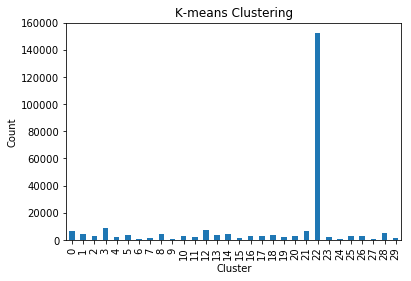

In [121]:
ax = frame['cluster'].value_counts().sort_index().plot(kind = "bar", title='K-means Clustering')
ax.set_xlabel("Cluster")
ax.set_ylabel("Count")

In [28]:
X_test = tf_vectorizer.transform(["god bless america", 
                                  "music videos are awesome", 
                                  "comey lied about trump", 
                                  "great time running today",
                                 "fitbit"])

In [29]:
doc_topic_dist_unnormalized = np.matrix(lda_model.transform(X_test))

In [31]:
doc_topic_dist = doc_topic_dist_unnormalized/doc_topic_dist_unnormalized.sum(axis=1)

In [32]:
doc_topic_dist

matrix([[ 0.01333333,  0.01333333,  0.01333333,  0.01333333,  0.01333333,
          0.21333333,  0.01333333,  0.01333333,  0.01333333,  0.01333333,
          0.01333333,  0.01333333,  0.01333333,  0.61333333,  0.01333333],
        [ 0.26666667,  0.01666667,  0.26666667,  0.01666667,  0.01666667,
          0.01666667,  0.01666667,  0.01666667,  0.01666667,  0.01666667,
          0.01666667,  0.01666667,  0.26666667,  0.01666667,  0.01666667],
        [ 0.01666667,  0.01666667,  0.01666667,  0.01666667,  0.01666667,
          0.76666667,  0.01666667,  0.01666667,  0.01666667,  0.01666667,
          0.01666667,  0.01666667,  0.01666667,  0.01666667,  0.01666667],
        [ 0.01333333,  0.01333333,  0.21333333,  0.01333333,  0.01333333,
          0.01333333,  0.21333333,  0.01333333,  0.01333333,  0.01333333,
          0.01333333,  0.01333333,  0.01333333,  0.21333333,  0.21333333],
        [ 0.06666667,  0.06666667,  0.06666667,  0.06666667,  0.06666667,
          0.06666667,  0.06666667,

In [33]:
doc_topic_dist.argmax(axis=1)

matrix([[13],
        [12],
        [ 5],
        [13],
        [ 0]])

In [43]:
lda_model = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda_W = lda_model.transform(tfidf)
lda_H = lda_model.components_

In [44]:
display_topics(lda_H, lda_W, tf_feature_names, train, no_top_words, no_top_documents)

Topic 0:
Top Words:  ps4 away game live baseball games lesbian looking console fun sex coming little ass house


Tweet:  caucasian and asian raven riding lesben vi lesbian porno adult pussy anal sex ass milf hot fuck mature lesbian porno adult pussy anal sex ass milf hot fuck mature
Tweet:  full gallery smoking hot teacher nikki benz stripping add me on snapchat sexyaddison9
Tweet:  full gallery lesbian milf francesca le pets ass licki add me on snapchat imdreamgirl
Tweet:  full gallery lesbian milf francesca le pets ass licki add me on snapchat mylila94 https
Tweet:  full gallery lesbian milf francesca le pets ass licki add me on snapchat mylila94


Topic 1:
Top Words:  new gay need new job jobs check healthy every girl everyone feel keep must around stay


Tweet:  the question is can he stay healthy
Tweet:  just landed a new position feeling determined
Tweet:  vp of iot why this new position is needed as iot grows iot iot
Tweet:  vp of iot why this new position is needed as iot grows

In [123]:
lda_H.shape

(30, 6577)

In [125]:
lda_W.shape

(250000, 30)